In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import universe
from universe import NAMES

%matplotlib inline

In [2]:
uv = universe.Universe()

uv.start_sim()

YEAR: 0
dead num: 0
battle num: 0
YEAR: 100
dead num: 89
battle num: 17
YEAR: 200
dead num: 99
battle num: 0
YEAR: 300
dead num: 99
battle num: 0
YEAR: 400
dead num: 99
battle num: 0
YEAR: 500
dead num: 99
battle num: 0
YEAR: 600
dead num: 99
battle num: 0
YEAR: 700
dead num: 99
battle num: 0
YEAR: 800
dead num: 99
battle num: 0
YEAR: 900
dead num: 99
battle num: 0


In [56]:
df_begin = pd.read_csv('log/0_civ.csv', index_col=False)
print("模拟开始时，三类属性分布为:{0:结盟型,1:好战性,2:保守型}")
df_begin.attr.value_counts()

模拟开始时，三类属性分布为:{0:结盟型,1:好战性,2:保守型}


1    34
0    34
2    32
Name: attr, dtype: int64

In [57]:
df_end = pd.read_csv('log/999_civ.csv', index_col=False)
print("模拟结束时，三类属性分布为：{0:结盟型,1:好战性,2:保守型}")
df_end[df_end.mlb!=0].attr.value_counts()

模拟结束时，三类属性分布为：{0:结盟型,1:好战性,2:保守型}


2    32
Name: attr, dtype: int64

In [58]:
gl_begin = pd.read_csv('log/0_galaxy.csv', index_col=False)
gl_mid = pd.read_csv('log/400_galaxy.csv', index_col=False)
gl_end = pd.read_csv('log/999_galaxy.csv', index_col=False)

In [6]:
pos = pd.read_csv('log/pos.csv')
pos.columns = ["x", "y"]

In [24]:
def get_type_color(galaxy, civ):
    colors = []
    alpha = []
    cls = [[20,220,20], [220,20,20], [20,20,220], [220,220,220]]
    for row in galaxy.belong_to:
        if row is None or row is np.nan:
            colors.append(cls[3])
            alpha.append(0.2)
            continue
        try:
            colors.append(cls[civ.attr[row]])
            alpha.append(1)
        except TypeError:
            alpha.append(0.2)
            colors.append(cls[3])
    return np.array(colors) / 256
def plot_map(gl, civ, mask=None, plotsize=20, alpha=0.8):
    print("红色为战斗民族，绿色为交好民族， 蓝色为保守民族。灰色为未被占领地")
    if mask is None:
        colors = get_type_color(gl, civ)
        sns.plt.scatter(pos.x, pos.y, c=colors, alpha=alpha, s=plotsize)
    else:
        colors = get_type_color(gl[mask], civ)
        sns.plt.scatter(pos[mask].x, pos[mask].y, c=colors, alpha=alpha, s=plotsize)
        

In [25]:
def plot_range(gl, civ, alive=True):
    mask = np.logical_not(gl.belong_to.isnull()) if alive else None
    plot_map(gl, civ, mask=mask, plotsize=gl.dtrange, alpha=0.5)

In [54]:
def plot_time_info(year, ret=False, alive=True):
    civ = pd.read_csv('log/%d_civ.csv' % (year, ), index_col=False)
    gl = pd.read_csv('log/%d_galaxy.csv' % (year, ), index_col=False)
    plot_range(gl, civ, alive=alive)
    if ret:
        return civ, gl

红色为战斗民族，绿色为交好民族， 蓝色为保守民族。灰色为未被占领地


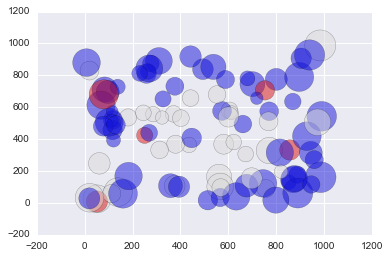

In [55]:
plot_time_info(100, alive=False)

In [61]:
import os

In [63]:
os.listdir?